# Best Prepaid Plan for Telecom Operator Megaline


In this project I will carry out an analysis for a Megaline telecom operator. The company offers two prepaid plans, Surf and Ultimate. The aim of th project is to study the clients' behavior and determine which prepaid plan brings in more revenue. To do this, we have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.

I am going to begin the analysis trying to understand the differences in the behavior of the customers of each plan. To do this I need to determine the minutes of calls, the messages and, the volume of data the users of each plan require per month and study their distribution.

When I have the information about the customers´ monthly usage, I will be able to calculate the average revenu for the customers of each plan. I can then compare the two means to determine if there is a statistically significant difference between the two. To do this, I will formulate hypotheses and use the appropriate method to test them.

# Step 1: Open the data file and study the general information


Importing libraries and data

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



General information, and preview of first/last five rows, description of datasets

In [2]:
calls = pd.read_csv("datasets/megaline_calls.csv")
internet = pd.read_csv("datasets/megaline_internet.csv")
messages = pd.read_csv("datasets/megaline_messages.csv")
plans = pd.read_csv("datasets/megaline_plans.csv")
users = pd.read_csv("datasets/megaline_users.csv")

In [3]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The dataframe `users` contains personal information of customers and more importantly the plan they use and their `user_id`. We have many missing values in the column `churn_date`, probably because the customer has not churned.

In [5]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

The dataframe `calls` contains all the individual calls, the date when they were made, their duration and, the user that made it. The minimum duration of the calls is 0 seconds (maybe unanswered calls) while the call with the longest duration is just over 37 minutes.

In [8]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

The dataframe `internet` contains all the individual web session, the date when it was made, the duration and, the user that made it. The MegaBytes used for web sessions have a range from 0 to 1693.47 MB.

In [11]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The dataframe `messages` contains all the messages, the date when it was sent and, the user that sent it.

In [13]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The dataframe `plans` contains all the information about the plans, the messages, the minutes, and the mb per month included in the plan, the price that the user have to pay if he exceeds the limit

# Step 2: Preparing the data


We have see that the `["churn_date"]` column contains missing values. I decided to drop the column because I am not going to need it for my analysis 

In [14]:
users = users.drop(columns = "churn_date")

In [15]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf


We saw that some calls and web sessions lasted 0 second. I decide to keep these rows, keeping them will help me to determine the months in which the customer was registred and has to pay the monthly fee. 

## Calculate the monthly revenue

### Call monthly revenue

In [16]:
# creating a new column with months based on call date
calls["month"] = pd.to_datetime(calls["call_date"]).dt.month

In [17]:
# rounding up the duration for each calls
calls["rounded_call_duration"] = np.ceil(calls["duration"])

In [18]:
# using a pivot table to group the calls for user and month. Using count() to determine the number and sum() to determine the duration
grouped_calls = pd.pivot_table(calls, index=["user_id", "month"],  values=["duration", "rounded_call_duration"], aggfunc=["sum","count"]).reset_index()

# renaming columns
grouped_calls.columns = ["user_id", "month",  "call_duration", "rounded_call_duration", "call_number", "call_number_d"]

# droping duplicate column
grouped_calls = grouped_calls.drop(columns="call_number_d")
# merging with users dataframe to copy the columns plan
grouped_calls = grouped_calls.merge(users[["user_id", "plan"]], on="user_id")

grouped_calls

,user_id,month,call_duration,rounded_call_duration,call_number,plan
0,1000,12,116.83,124.0,16,ultimate
1,1001,8,171.14,182.0,27,surf
2,1001,9,297.69,315.0,49,surf
3,1001,10,374.11,393.0,65,surf
4,1001,11,404.59,426.0,64,surf
...,...,...,...,...,...,...
2253,1498,12,324.77,339.0,39,surf
2254,1499,9,330.37,346.0,41,surf
2255,1499,10,363.28,385.0,53,surf
2256,1499,11,288.56,308.0,45,surf


In [19]:
# determining the revenue from calls only based on active plane

def calls_revenue(rounded_call_duration, plan):
    
    revenue = 0
    
    if plan == "ultimate": # checking plan type
        revenue += (rounded_call_duration - 3000) * 0.01 # ultimate has 3000 minutes of free call and the extra minute costs 0.01 
    else:
        revenue += (rounded_call_duration - 500) * 0.03  # surf has 500 minutes of free call and the extra minute costs 0.03
    
    if revenue < 0:   # if revenue is less than 0 means that CUS used only free minutes. Revenue is 0
        return 0
    else:
        return revenue
        
# creating new column call_revenue with values from the function
grouped_calls["call_revenue"] = grouped_calls.apply(lambda x: calls_revenue(x['rounded_call_duration'], x['plan']), axis=1)

# droping column plan
grouped_calls = grouped_calls.drop(columns="plan")

grouped_calls

,user_id,month,call_duration,rounded_call_duration,call_number,call_revenue
0,1000,12,116.83,124.0,16,0.0
1,1001,8,171.14,182.0,27,0.0
2,1001,9,297.69,315.0,49,0.0
3,1001,10,374.11,393.0,65,0.0
4,1001,11,404.59,426.0,64,0.0
...,...,...,...,...,...,...
2253,1498,12,324.77,339.0,39,0.0
2254,1499,9,330.37,346.0,41,0.0
2255,1499,10,363.28,385.0,53,0.0
2256,1499,11,288.56,308.0,45,0.0


To determine the calls revenue, I rounded up each individual call duration. Then I used a pivot table to group the calls by month and user and to sum them. 

Now that I know the minutes used by every single customer for each month I can subtract the monthly limit set by the plan and multiply the result by the calling plan value.

If the result is negative, it means that the customer did not exceed the limit and the revenue is 0, otherwise  revenue is precisely the result of the function. I stored the results in the `["call_revenue"]` columns 

### Internet Monthly Revenue

In [20]:
# creating a new column with months based on session date
internet["month"] = pd.to_datetime(internet["session_date"]).dt.month

In [21]:
# using pivot table to determine mb used each month by each customer
grouped_internet = (pd.pivot_table(internet, index=["user_id", "month"], values="mb_used", aggfunc="sum")
    .reset_index())

# mergine column plan we are going to use it for our calculation
grouped_internet = grouped_internet.merge(users[["user_id", "plan"]], on="user_id")


In [22]:
# converting mb in gb and rounding up 
    
grouped_internet["gb_used"] = np.ceil(grouped_internet["mb_used"]/1024)
grouped_internet

,user_id,month,mb_used,plan,gb_used
0,1000,12,1901.47,ultimate,2.0
1,1001,8,6919.15,surf,7.0
2,1001,9,13314.82,surf,14.0
3,1001,10,22330.49,surf,22.0
4,1001,11,18504.30,surf,19.0
...,...,...,...,...,...
2272,1498,12,23137.69,surf,23.0
2273,1499,9,12984.76,surf,13.0
2274,1499,10,19492.43,surf,20.0
2275,1499,11,16813.83,surf,17.0


In [23]:
# determining revenue from gb only
def internet_revenue(gb_used, plan):
    
    revenue = 0
    
    if plan == "ultimate":
        revenue += (gb_used - 30) * 7 # ultimate has 30 free gb and extra gb costs 7 usd
    else:
        revenue += (gb_used - 15) * 10 # serf has 15 free gb and extra gb costs 15 usd
    
    if revenue < 0: # if revenue is less then 0 CUS used only free gb and revenue is 0
        return 0
    else:
        return revenue
        

# creating gb_revenue column with values determined by the function        
grouped_internet["gb_revenue"] = grouped_internet.apply(lambda x: internet_revenue(x['gb_used'], x['plan']), axis=1)
grouped_internet = grouped_internet.drop(columns="plan")

grouped_internet

,user_id,month,mb_used,gb_used,gb_revenue
0,1000,12,1901.47,2.0,0.0
1,1001,8,6919.15,7.0,0.0
2,1001,9,13314.82,14.0,0.0
3,1001,10,22330.49,22.0,70.0
4,1001,11,18504.30,19.0,40.0
...,...,...,...,...,...
2272,1498,12,23137.69,23.0,80.0
2273,1499,9,12984.76,13.0,0.0
2274,1499,10,19492.43,20.0,50.0
2275,1499,11,16813.83,17.0,20.0


To determine the internet revenue, I converted megabyte to gigabyte and since the service provider, for web traffic, does not round up the individual web sessions, but the total for the month, I grouped the web session by month and user before to apply the `ceil()` method. 

I subtracted the monthly limit set by the plan and multiply the result by the plan value. I stored the results in the `["gb_revenue"]` columns 

### Message Monthly Revenue

In [24]:
# creating a month columns based on message_date
messages["month"] = pd.to_datetime(messages["message_date"]).dt.month

# using pivot table to determine the number of message each user used each month
grouped_messages = pd.pivot_table(messages, index=["user_id", "month"],  values="id", aggfunc="count").reset_index()

# renaming columns
grouped_messages.columns = ["user_id", "month", "message_number"]

# coping column plane from users
grouped_messages = grouped_messages.merge(users[["user_id", "plan"]], on="user_id")

In [25]:
# determining revenue from message
def messages_revenue(message_number, plan):
    
    revenue = 0
    
    if plan == "ultimate":
        revenue += (message_number - 1000) * 0.01 # ultimate has 1000 free messages and each extra message costs 0.01
    else:
        revenue += (message_number - 50) * 0.03  # surf has 50 free messages and each extra message costs 0.03
    
    if revenue < 0: # if revenue less then 0, revenue is 0
        return 0
    else:
        return revenue
        
# creating the message_revenue and appling the function
grouped_messages["messages_revenue"] = grouped_messages.apply(lambda x: messages_revenue(x['message_number'], x['plan']), axis=1)
grouped_messages = grouped_messages.drop(columns="plan")
grouped_messages

,user_id,month,message_number,messages_revenue
0,1000,12,11,0.00
1,1001,8,30,0.00
2,1001,9,44,0.00
3,1001,10,53,0.09
4,1001,11,36,0.00
...,...,...,...,...
1801,1496,9,21,0.00
1802,1496,10,18,0.00
1803,1496,11,13,0.00
1804,1496,12,11,0.00


To determine the message revenue, I grouped the message by month and user I subtracted the monthly limit set by the plan and multiply the result by the plan value. I stored the results in the `["messages_revenue"]` columns 


### Total Monthly Revenue for each customer

In [26]:
# merging the tables grouped_internet, _calls and _messages to dataframe users 

final1= pd.merge(left = grouped_internet , 
                right = grouped_calls, how='outer',on=['user_id', 'month']).fillna(0)
final2=pd.merge(left = final1 , 
                right = grouped_messages, how='outer',on=['user_id', 'month']).fillna(0)

data = final2.merge(users, on="user_id")



In [27]:
# determining monthly revenue for each customer
def monthly_revenue(plan, messages_revenue, call_revenue, gb_revenue ):
       # add the montly charge to messages_revenue, call_revenue and gb_revenue 
    if plan == "ultimate":
        return  70 + messages_revenue + call_revenue + gb_revenue # for ultimate monthly charge is 70
    else:
        return 20 + messages_revenue + call_revenue + gb_revenue # for surf monthly charge is 20
    
data["monthly_revenue"] = data.apply(lambda x: monthly_revenue(x['plan'], x['messages_revenue'], x['call_revenue'], x['gb_revenue']), axis=1)
data.head() 

,user_id,month,mb_used,gb_used,gb_revenue,call_duration,rounded_call_duration,call_number,call_revenue,message_number,messages_revenue,first_name,last_name,age,city,reg_date,plan,monthly_revenue
0,1000,12,1901.47,2.0,0.0,116.83,124.0,16.0,0.0,11.0,0.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,70.00
1,1001,8,6919.15,7.0,0.0,171.14,182.0,27.0,0.0,30.0,0.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
2,1001,9,13314.82,14.0,0.0,297.69,315.0,49.0,0.0,44.0,0.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00
3,1001,10,22330.49,22.0,70.0,374.11,393.0,65.0,0.0,53.0,0.09,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,90.09
4,1001,11,18504.30,19.0,40.0,404.59,426.0,64.0,0.0,36.0,0.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.00


 I merged all the previously created dataframes, determined the total monthly revenue for each customer and stored the result in the `["revenue"]` columns

In [28]:
data = data.drop(columns=["mb_used", "gb_revenue", "rounded_call_duration", "call_revenue", "messages_revenue", "first_name", "last_name", "age", "reg_date"])
data.head()

,user_id,month,gb_used,call_duration,call_number,message_number,city,plan,monthly_revenue
0,1000,12,2.0,116.83,16.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,7.0,171.14,27.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,14.0,297.69,49.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,22.0,374.11,65.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,19.0,404.59,64.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


 I created a new dataframe `data` that contains only the information I need for the rest of the analysis

# Step 3. Analyze the data

### Describing the customers' behavior


In [29]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,2293.0,1246.075883,143.051927,1000.0,1122.00,1245.00,1368.00,1499.00
month,2293.0,9.172700,2.496386,1.0,8.00,10.00,11.00,12.00
gb_used,2293.0,16.870475,7.796174,0.0,12.00,17.00,21.00,70.00
call_duration,2293.0,405.211627,223.383523,0.0,249.13,400.16,540.45,1431.22
call_number,2293.0,60.067597,32.402563,0.0,38.00,60.00,79.00,205.00
message_number,2293.0,33.166594,34.070085,0.0,3.00,26.00,51.00,266.00
monthly_revenue,2293.0,64.351147,46.624945,20.0,23.48,70.00,70.00,590.37


On average, in a month, a customer of Megaline spent about 405 minutes on calls in 2018. The maximum duration a customer spend on calls in a month is about 1430 minutes. In a month, a customer makes about 60 calls on average. 

Averagely, a customer of megaline sends about 33 text messages in a month. The highest number of text messages a customer sent in a month in 2018 was 266. 

In a month, a customer of Megaline uses about 17 gigabytes of data, and largest data used in a month in 2018 was about 70 Gigabytes.

The highest revenue generated in a month from a customer was about $590.37 ; the minimum was about 20.00 dollars. The average revenue Megaline generated in a month from its' customers in 2018 was about 64.35 dollars

In [30]:
Monthly_revenue_distribution = data.pivot_table(index=["month", "plan"], values="monthly_revenue", aggfunc= "sum")
Monthly_revenue_distribution

monthly_revenue
month plan                     
1     surf                40.00
      ultimate           280.00
2     surf               309.57
      ultimate           490.00
3     surf              1056.65
      ultimate           896.00
4     surf              2035.53
      ultimate          1533.00
5     surf              3667.37
      ultimate          2051.00
6     surf              4779.80
      ultimate          3367.00
7     surf              7583.56
      ultimate          4242.00
8     surf             10356.85
      ultimate          5173.00
9     surf             11304.67
      ultimate          6195.00
10    surf             15504.83
      ultimate          7665.00
11    surf             16415.21
      ultimate          9107.00
12    surf             22437.14
      ultimate         11067.00

In January 2018, the Surf plan generated about 7 times lower of the sum of revenue the Ultimate plan generated for Mageline. However, in December 2018, the Surf plan generated more than twice the sum of revenue by the Ultimate plan.

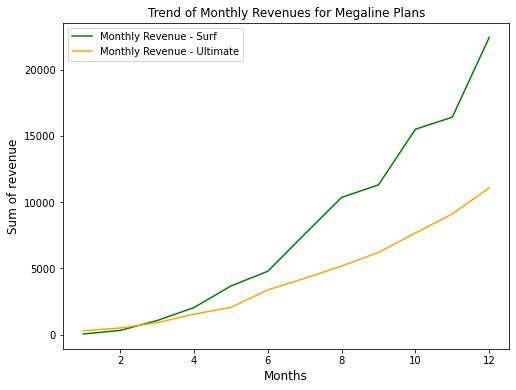

In [31]:
surf=Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="surf"].reset_index()
ultimate= Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="ultimate"].reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
plt.plot(surf["month"], surf["monthly_revenue"],color="green", label="Monthly Revenue - Surf", )
plt.plot(ultimate["month"],ultimate["monthly_revenue"], color="orange", label="Monthly Revenue - Ultimate")
plt.legend()
plt.title("Trend of Monthly Revenues for Megaline Plans", fontdict={"size":12})
plt.ylabel("Sum of revenue", fontdict={"size":12})
plt.xlabel("Months", fontdict={"size":12})
plt.show()

From March 2018, the Surf plan continuously generated more monthly revenue than the Ultimate plan. 

In [32]:
surf_revenue = round(Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="surf"].sum(),2)[0]
print(f'Total revenue for surf plan in 2018 were: {surf_revenue} $')

Total revenue for surf plan in 2018 were: 95491.18 $


In [33]:
ultimate_revenue = round(Monthly_revenue_distribution[Monthly_revenue_distribution.index.get_level_values(1)=="ultimate"].sum(),2)[0]
print(f'Total revenue for ultimate plan in 2018 were: {ultimate_revenue} $')

Total revenue for ultimate plan in 2018 were: 52066.0 $


Filtering surf plane dataframe

In [34]:
surf_customers = data.query('plan == "surf"')

In [35]:
surf_customers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,1573.0,1242.755245,139.227939,1001.0,1120.00,1245.00,1358.00,1499.00
month,1573.0,9.182454,2.468199,1.0,8.00,10.00,11.00,12.00
gb_used,1573.0,16.670693,7.847522,0.0,12.00,17.00,21.00,70.00
call_duration,1573.0,404.762390,221.664397,0.0,255.47,401.76,543.68,1431.22
call_number,1573.0,59.811825,32.017989,0.0,39.00,60.00,79.00,205.00
message_number,1573.0,31.159568,33.566717,0.0,3.00,24.00,47.00,266.00
monthly_revenue,1573.0,60.706408,55.388042,20.0,20.00,40.36,80.36,590.37


On Average, a customer on the surf plan spends about 404 minutes on calls in a month with a standard deviation (sd) of about 221. The sd indicates the data points of customers on the surf plan are largely away from the mean. 

On average, a customer on the surf plan texts about 31 messages a month with a standard deviation of about 33.57 messages.

A customer on the surf plan uses about 17 gigabytes of data in a month with standard deviation of about 7.8 gigabytes. This implies the data points with regards to usage of data on the surf plan are largely spread out. 

The average monthly revenue generated by a Surf plan client in a month is about 61 dollars with a sd of about 55 dollars.

Filtering ultimate plan dataframe



In [36]:
ultimate_customers = data.query('plan == "ultimate"')

In [37]:
ultimate_customers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,720.0,1253.330556,150.915644,1000.0,1126.00,1241.500,1401.0000,1497.00
month,720.0,9.151389,2.558495,1.0,8.00,10.000,11.0000,12.00
gb_used,720.0,17.306944,7.670108,0.0,13.00,17.000,21.0000,46.00
call_duration,720.0,406.193083,227.246499,0.0,246.29,398.585,532.2275,1292.09
call_number,720.0,60.626389,33.242994,0.0,36.00,61.000,80.0000,191.00
message_number,720.0,37.551389,34.767179,0.0,7.00,30.000,61.0000,166.00
monthly_revenue,720.0,72.313889,11.395108,70.0,70.00,70.000,70.0000,182.00


On Average, a customer on the ultimate plan spends about 406 minutes on calls in a month with a standard deviation (sd) of about 227. The sd indicates the data points of customers on the ultimate plan are largely away from the mean.

On average, a customer on the ultimate plan texts about 38 messages a month with a standard deviation of about 35 messages.

A customer on the ultimate plan uses about 17 gigabytes of data in a month with standard deviation of about 7.7 gigabytes. This implies the data points with regards to usage of data on the utlimate plan are largely spread out.

The average monthly revenue generated by a Ultimate plan client in a month is about 72 dollars with a sd of about 11 dollars.

### Ploting histograms

Histogram for call duration

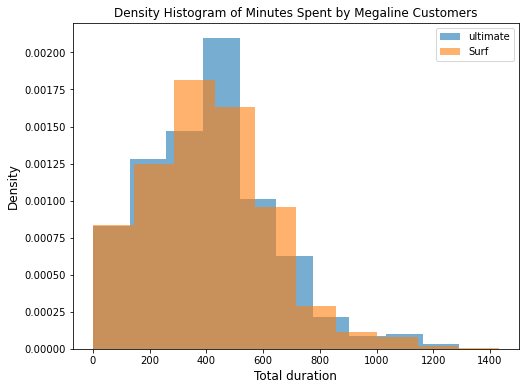

In [38]:
ultimate_customers["call_duration"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_customers["call_duration"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.legend()
plt.title("Density Histogram of Minutes Spent by Megaline Customers", fontdict={"size":12})
plt.xlabel("Total duration", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

Relatively, the behavior of customers on both the ultimate and surf plan on monthly minutes follow a similar trend. Majority of customers on both the ultimate and surf plan spend below 600 call minutes a month. The surf plan peaks around 400 call minutes while the ultimate plan peaks between 400 and 600 minutes. The distributions are both skewed a bit to the right (even though they look approximately normal).

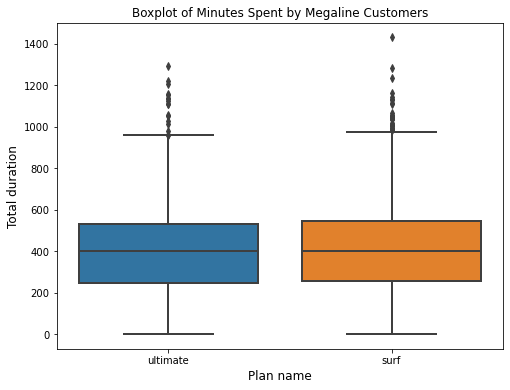

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan", y="call_duration", data =data, linewidth =2, ax=ax)
plt.title("Boxplot of Minutes Spent by Megaline Customers", fontdict={"size":12})
plt.ylabel("Total duration", fontdict={"size":12})
plt.xlabel("Plan name", fontdict={"size":12})
plt.show()

The plans have almost the same (or same) median values.

Each plan has outliers. There are calls that lasted more than 1000 minutes for both Surf and Ultimate. The Surf plan has a call duration above 1400 minutes. 

Histogram for total messages



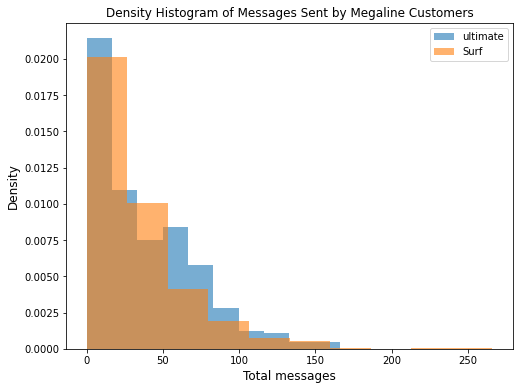

In [40]:
ultimate_customers["message_number"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_customers["message_number"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Messages Sent by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Total messages", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

Again, in relative terms, customers on the surf plan behave similar to customers on the ultimate plan with regards to text messages. Majority of the customers text less. The distributions are positively skewed.

Plotting boxplot for each plan's total messages



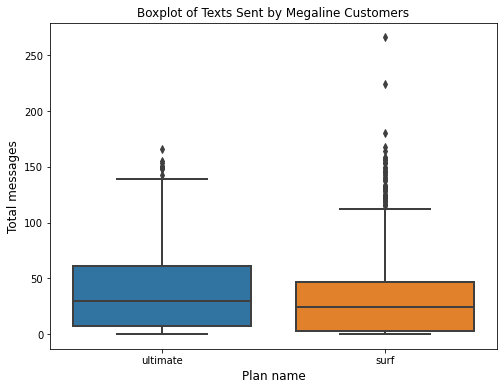

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan", y="message_number", data =data, linewidth =2,ax=ax)
plt.title("Boxplot of Texts Sent by Megaline Customers", fontdict={"size":12})
plt.ylabel("Total messages", fontdict={"size":12})
plt.xlabel("Plan name", fontdict={"size":12})
plt.show()

 The ultimate plan has a higher interquartile range, i.e. wider middle half values of total messages, and a higher median compared to the surf plan. The ultimate plan has comparatively few outliers with regards to messages sent. The ouliers are between 140 and 200 messages for the ultimate plan. The surf plan has a lot of outliers from about 110 messages to more than 250 messages.

Histogram for data usage



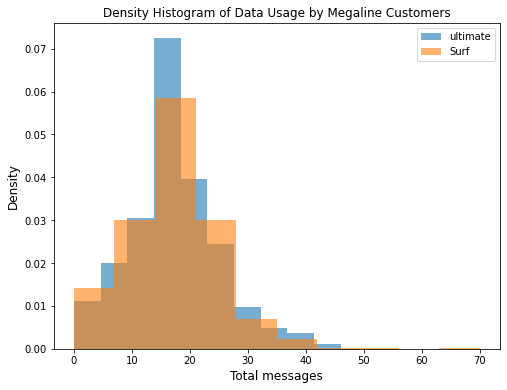

In [42]:
ultimate_customers["gb_used"].plot(kind="hist",label="ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_customers["gb_used"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Data Usage by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Total messages", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

Like the other packages, considering data usage, customers on the surt plan behaves similar relative to customers on the ultimate plan. The peak of data usage are both around 20 gigabytes. The distributions are both approximately normal.

Plotting boxplot for each plan's data usage



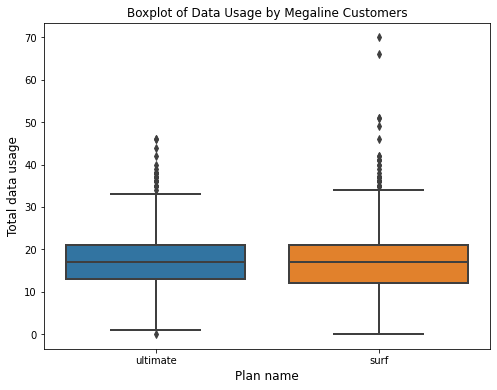

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="plan", y="gb_used", data =data, linewidth =2, ax=ax)
plt.title("Boxplot of Data Usage by Megaline Customers", fontdict={"size":12})
plt.ylabel("Total data usage", fontdict={"size":12})
plt.xlabel("Plan name", fontdict={"size":12})
plt.show()

Both plans have a similar median. The Surf plan has more outliers than the ultimate plan. The outliers for the ultimate plan falls between about 35 and 50 gigabytes of data. The outliers for the Surf plan ranges from about 35 to more than 70 gigabytes of data.

### Determining how many user exceed the plan limit

In [44]:
# determining the percentage of customes that exceed the limit

print("Percentage of surf customes that exceed the call using limit:", (surf_customers["call_duration"] > 500).mean())

Percentage of surf customes that exceed the call using limit: 0.3076923076923077


In [45]:
# determining the percentage of customes that exceed the limit

print("Percentage of ultimate customes that exceed the call using limit:", (ultimate_customers["call_duration"] > 3000).mean())

Percentage of ultimate customes that exceed the call using limit: 0.0


In [46]:
# determining the percentage of customes that exceed the limit

print("Percentage of surf customes that exceed the gigabyte using limit:",(surf_customers["gb_used"] > 15).mean())

Percentage of surf customes that exceed the gigabyte using limit: 0.5791481246026701


In [47]:
# determining the percentage of customes that exceed the limit

print("Percentage of ultimate customes that exceed the gigabyte using limit:", (ultimate_customers["gb_used"] > 30).mean())

Percentage of ultimate customes that exceed the gigabyte using limit: 0.05694444444444444


In [48]:
# determining the percentage of customes that exceed the limit

print("Percentage of surf customes that exceed the message using limit:", (surf_customers["message_number"] > 50).mean())

Percentage of surf customes that exceed the message using limit: 0.2161474888747616


In [49]:
# determining the percentage of customes that exceed the limit

print("Percentage of ultimate customes that exceed the gigabyte using limit:", (ultimate_customers["message_number"] > 1000).mean())

Percentage of ultimate customes that exceed the gigabyte using limit: 0.0


### Interim Conclusion

the users of the Surf plan and the users of the Ultimate plan is very similar, they use in average the same minutes, messages and volume of data per month. The difference is that the users of the Ultimate plan almost never have exceeded the monthly limit, while the users of Surf plan exceeded the minutes limit 31% of the time, the message limit 22% of the time and the GB limit 58% of the time.

# Step 4. Test the hypotheses

### Hypothesis test 1
#### Claim: The average revenue from users of Ultimate and Surf calling plans differs

Previewing revenue distributions



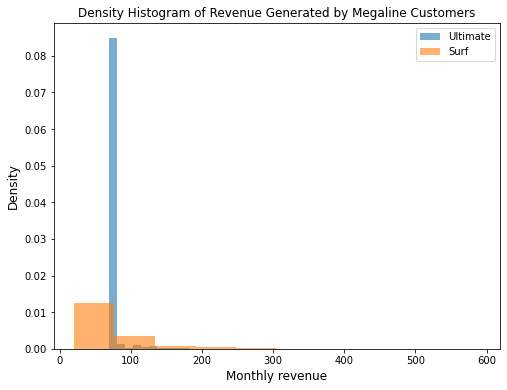

In [50]:
ultimate_customers["monthly_revenue"].plot(kind="hist",label="Ultimate", density=True, figsize=(8,6),alpha=0.6)
surf_customers["monthly_revenue"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Revenue Generated by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Monthly revenue", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

### Test for normality 

We can state the following hypotheses:

- H0 - The distribution for Surf revenue users is a normal distribution

- H1 - The distribution for Surf revenue users is not a normal distribution

We can test these hypotheses using the Shapiro-Wilk Test. 


In [51]:
# normality test 
#Shapiro-Wilk Test
# null hypotesis = normaly distribuited
stat, pvalue = st.shapiro(surf_customers['monthly_revenue'])
alpha = 0.05
if pvalue < alpha:
    print("We reject the null hypothesis: the data are not normal distribuited")  
else:
    print("We can't reject the null hypothesis: the data are normally distribuited") 

We reject the null hypothesis: the data are not normal distribuited


The revenue streams are not normally distributed and the samples are unpaired. Therefore, we can use Mann-Whitney U to test if the sample distributions are the same.

Hypotheses:

- H0: The average revenue from users of Ultimate and Surf calling plans are the same

- H1: The average revenue from users of Ultimate and Surf calling plans differs

In [52]:
#Mann-Whitney U test
# null hypothesis mean are equal
stat, pvalue = st.mannwhitneyu(ultimate_customers['monthly_revenue'], surf_customers['monthly_revenue'])
alpha = 0.05
print("pvalue:", pvalue)

if pvalue < alpha:
    print("We reject the null hypothesis: the average revenue from users of Ultimate and Surf calling plans differs")  
else:
    print("We can't reject the null hypothesis: the average revenue from users of Ultimate and Surf calling plans are the same") 

pvalue: 1.9121793747947493e-48
We reject the null hypothesis: the average revenue from users of Ultimate and Surf calling plans differs


**The test provides evidence to support the claim that the average revenue from users of Ultimate and Surf calling plans differs**



### Hypothesis test 2

- H0: The average revenue from users in NY-NJ area is not different from that of the users from other regions.

- H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [53]:
#  creating a function to classify customes based on city. 
def area_func(city):
    
    if ("NY" in city) or ("NJ" in city):
        return "NY NJ"
    else:
        return "Others"
    
# new columns ["purpose_category"]
data["area"] = data["city"].apply(area_func)

In [54]:
ny_nj_customers = data.query('area == "NY NJ"')

In [55]:
other_areas_customers = data.query('area == "Others"')

Previewing revenue distributions


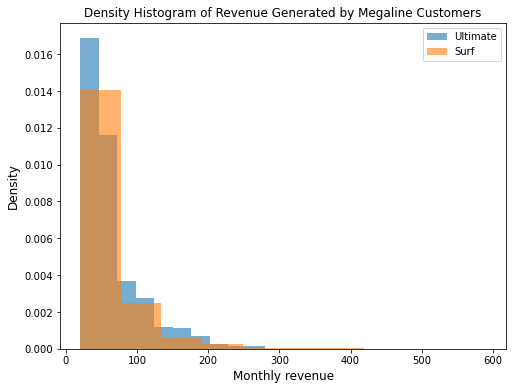

In [56]:
ny_nj_customers["monthly_revenue"].plot(kind="hist",label="Ultimate", density=True, figsize=(8,6),alpha=0.6)
other_areas_customers["monthly_revenue"].plot(kind="hist",label="Surf", density=True, figsize=(8,6), alpha=0.6)
plt.title("Density Histogram of Revenue Generated by Megaline Customers", fontdict={"size":12})
plt.legend()
plt.xlabel("Monthly revenue", fontdict={"size":12})
plt.ylabel("Density", fontdict={"size":12})
plt.show()

### Test for normality

We can state the following hypotheses:
- H0 - The distribution for other area users revenue is a normal distribution 
- H1 - The distribution for other area users revenue is not a normal distribution

and use a Shapiro-Wilk Test to test them

In [57]:
# normality test 
#Shapiro-Wilk Test
# null hypotesis = normaly distribuited
stat, pvalue = st.shapiro(other_areas_customers['monthly_revenue'])
alpha = 0.05
if pvalue < alpha:
    print("We reject the null hypothesis: the data are not normal distribuited")  
else:
    print("We can't reject the null hypothesis: the data are normally distribuited") 

We reject the null hypothesis: the data are not normal distribuited


The revenue streams are not normally distributed and the samples are unpaired. Therefore, we can use Mann-Whitney U to test if the sample distributions are the same.

In [58]:
#Mann-Whitney U test
# null hypothesis mean are equal
stat, pvalue = st.mannwhitneyu(ny_nj_customers['monthly_revenue'], other_areas_customers['monthly_revenue'])
alpha = 0.05
print("pvalue:", pvalue)

if pvalue < alpha:
    print("We reject the null hypothesis: H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.")  
else:
    print("We can't reject the null hypothesis: The average revenue from users in NY-NJ area is not different from that of the users from other regions.") 

pvalue: 0.002070527266724031
We reject the null hypothesis: H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.


## Conclusion

The goal of this project is to detrmine if the average revenue from users of Ultimate and Surf calling plans differs and if the average revenue from users in NY-NJ area is different from that of the users from other regions. I started to determine the mean for each group of users:

- Surf user revenue mean: 60.71
- Ultimate user revenue mean: 72.31
- NY-Nj are user revenue mean: 61.36
- Others area user revnue mean: 65.16

we can see that the average revenue is different for each group, but to answer the questions, is it not enough to simple compare these numbers, we need to understand if these differences are statistically significant.

I started studing the difference between the average revenue from users of Ultimate and Surf calling plans. 

I formulated the null hypothesis H₀:  

**The means of the two populations are equal to each other.**

and the alternative hypothesis, H₁, based on H₀:

**The means of the two populations are not equal to each other.**

Our test is going to determine which of this hyphotesis can be rejected and which can not be rejected. 

We are going to determine the **p-value**. The p-value is the probability of getting a result at least as extreme as the one we are considering, assuming that the null hypothesis is correct. 

In other words, we assume that the means of the two populations are equal, but when we select two samples from the populations the means of these two samples are different. The p-value tells us if this difference is due to the randomness introduced by the sampling, or if this difference is statistically significant. 
A high p-value tells us that there is a high probability that the difference is due to randomness. A low p-value tells us that is unlikely that the difference is due to the sampling.

When we have the p-value that is a value that ranges from 0 to 1, we are going to compare it to the level of significance we choose for our test, which we call **alpha**. In this project, I chose an alpha equal to 0.05. If the p-value is less than alpha, means that we can reject the null hypothesis because the means of the two samples are different and this difference is statistically significant. 

In our project, we have already determined that the average revenue from users of Ultimate is different from the average revenue from users of Surf. Our test is going to tell us if this difference is random, in this case, we would have a high p-value or if is statistically significant, and in this case, the p-value would be smaller than alpha.  

Before testing these hypotheses, we need to determine if the distribution of the population is a normal distribution. If the population has a normal distribution, we can test the hypothesis using the **Student´s T-Test**, if not, we can use the **Mann-Whitney U-Test**.

To test if the population is normally distributed, we are going to formulate the following hypothesis and then test them using the **Shapiro-Wilk Test**:

null hypothesis H₀:  

**The population is normally distributed.**

and the alternative hypothesis, H₁, based on H₀:

**The population is normally distributed.**

The result of the test is "We reject the null hypothesis".

**The population is not normally distributed and to test our hypothesis on the mean of the populations, we use the Mann-Whitney U-Test.**

Now we can test the hypothesi on the mean of the population: 

null hypothesis H₀:  

**The means of the two populations are equal to each other.**

and the alternative hypothesis, H₁, based on H₀:

**The means of the two populations are not equal to each other.**

The result of the test is "We reject the null hypothesis". **We are rejecting the hypothesis that the average revenue from users of Ultimate is equal to the average revenue of Surf calling plans.** We can conclude by saying that the Ultimate plan brings in more revenue and the company should invest the advertising budget on this plan.

I did the same test also for the average revenue from users in NY-NJ area and the average revenue of the users from other regions. This time the result is "We can't reject the null hypothesis". This means that **we can not reject the hypothesis that the average revenue from users in NY-NJ area is equal to the average revenue of the users from other regions.**

# Step 5. Write an overall conclusion

In this project we analyzed the customers´behavior of a telecom operator that offers two prepaid plans, Surf and Ultimate. The goal was to determine which prepaid plan brings in more revenue.

I started my analysis studing the minutes, texts, and volume of data the users of each plan require per month and ploting histograms for their distribution.

Regarding the **internet usage**, I determined that the average monthly Gb usage for Surf customers is `16.17` with a standard deviation of `7.82`, while for the Ultimate customers the mean is `16.81` with a standar deviation of `7.66`. 

Regarding the **amount of calls and their duration**, I determined that the users of Surf plan make an average of `59.81` calls per month and in average they use `404.76` minutes per month; the respective standard deviations are `221.59` and `32.01`. We have similar values also for the users of Ultimate plan, in average they do `60.63` calls per month and they use `406.19` minutes per month in average; he respective standard deviations are `227.09` and `33.22`. 

Regarding the **message**, I detrmined that the users of Surf plans sent in average `31.16` messages per month and the users of Ultimate plan `37.55`. 

We can see that the behavior of the users of the Surf plan and the users of the Ultimate plan is very similar, they use in average the same minutes, messages and volume of data per month. The difference is that the users of the Ultimate plan almost never have exceeded the monthly limit, while the users of Surf plan exceeded the minutes limit 31% of the time, the message limit 22% of the time and the GB limit 58% of the time. So, even though the two groups make very similar use of the mobile phone, the revenues from the two groups are quite different.

I detrmined the average revenue from users of Ultimate and the average revenue form user of Surf plan:


- Average Surf user revenue: 60.71 
- Average Ultimate user revenue : 72.31


We saw that the Ultimate users bring in more revenue, but before confirming this we had to test if this difference is statistically significant.

To do so, I used the Mann-Whitney U-Test, I formuled two alternative hypotheses: 

I formulated the null hypothesis H₀:  

**The means of the two populations are equal to each other.**

and the alternative hypothesis, H₁, based on H₀:

**The means of the two populations are not equal to each other.**

The result of the test was that **we reject the null hypothesis** and this confirm that the Ultimate plan brings in more revenue and the company should invest the advertising budget on this plan.

I did the same test also for the average revenue from users in NY-NJ area and the average revenue of the users from other regions. This time the result is "We can't reject the null hypothesis". This means that **we can not reject the hypothesis that the average revenue from users in NY-NJ area is equal to the average revenue of the users from other regions.** There is not significat difference between the customers of this two different areas. 